In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

%matplotlib inline

/home/virtualenv/tf9.0/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Reading data
data = pandas.read_excel("Sarcasm-data.xlsx")
data

,Serial,URL,Tweit,Categories,Annotation,Mai,Anwar,Nisreen,Areen,Du;'aa,...,2,3,4,5,6,7,8,9,10,11
0,1,https://twitter.com/ch_m_09/status/75609644494...,انتظرو الرئيس بعد قليل مباشرة في خطاب المطر حي...,Politices,Yes,Yes,Yes,No,Yes,Yes,...,1,1,-1,1,1,1,1,1,1,1
1,2,https://twitter.com/mhadi98/status/75642765068...,يمكن للوفد لبناني أن يشارك في القمة عن بعد ،عب...,Politices,Yes,Yes,No,No,No,No,...,1,-1,-1,-1,-1,-1,-1,-1,-1,1
2,3,https://twitter.com/medabdou/status/7561376890...,الجنرال مستعد ان يجعل فضيحتنا بجلاجل مقابل أن ...,Politices,NO,Yes,Yes,No,No,Yes,...,1,1,-1,-1,1,1,1,-1,1,1
3,4,https://twitter.com/charafahmed10/status/75610...,إن لم تتعامل السلطات بجد وحزم مع مسألة الصرف ا...,Politices,NO,No,Yes,Yes,No,No,...,-1,1,1,-1,-1,1,1,-1,-1,-1
4,5,https://mobile.twitter.com/Sakherah/status/758...,كانت ضريبة النوافذ إحدى أغرب الضرائب التي فرض...,Product and Services,NO,No,Yes,Yes,No,No,...,-1,1,1,-1,-1,1,1,-1,1,-1
5,6,https://mobile.twitter.com/Sakherah/status/758...,السياسة هي فن الخداع، تجد لها ميداناً فسيحاً ف...,Politices,NO,No,No,No,No,No,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
6,7,https://twitter.com/ZiadAbabneh/status/7604791...,قال ناشرين المانجا الي بالسوق انتاج اسرائيل اح...,Product and Services,Yes,Yes,Yes,Yes,Yes,Yes,...,1,1,1,1,1,1,-1,-1,1,1
7,8,https://mobile.twitter.com/Sakherah/status/757...,شهدت مصر القديمة فرض ضريبة على زيت الطهي، الذي...,Product and Services,NO,Yes,Yes,No,No,No,...,1,1,-1,-1,-1,-1,1,-1,-1,-1
8,9,https://mobile.twitter.com/Sakherah/status/756...,الديمقراطية هي جهاز يضمن عدم عيشنا أفضل مما نس...,Politices,NO,Yes,Yes,Yes,Yes,Yes,...,1,1,1,1,1,1,1,-1,1,1
9,10,https://mobile.twitter.com/Sakherah/status/756...,خلال العصور الوسطى، فرضت الحكومة البريطانية ضر...,Product and Services,NO,No,Yes,No,No,Yes,...,-1,1,-1,-1,1,-1,1,-1,1,-1


In [3]:
# combine all columns
cols = [r for r in data]
all = [data[i] for i in cols]
print("Number of columns=",len(all))
np.array(cols)

Number of columns= 26


array(['Serial', 'URL', 'Tweit', 'Categories', 'Annotation', 'Mai',
       'Anwar', 'Nisreen', 'Areen', "Du;'aa", 'Marah', "R'fat", 'Alaa',
       'Aya', 'Safaa', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11'], dtype='<U10')

In [19]:
# Preprocessing
import re
import string
import sys
import argparse

arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
english_letters_and_numbers = "qwertyuiopasdfghjklzxcvbnmQWERTYUIOPASDFGHJKLZXCVBNM1234567890\n\t\r"
punctuations_list = arabic_punctuations + english_punctuations + english_letters_and_numbers 

arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)


def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text


def remove_diacritics(text):
    text = re.sub(arabic_diacritics, '', text)
    return text


def remove_punctuations(text):
    translator = str.maketrans(' ', ' ', punctuations_list)
    return text.translate(translator)


def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

for i in range(len(all[2])):
    text = remove_punctuations(all[2][i])
    text = normalize_arabic(text)
    text = remove_diacritics(text)
    text = remove_repeating_char(text)
    all[2][i] = text.strip()
    

/home/virtualenv/tf9.0/lib/python3.5/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [20]:
# Assign each row to its score
ARR = [[] for i in range(23)]
for i in range(len(all[0])):
    sum=0
    for col in range(len(all)):
        if(col>14):
            sum+=all[col][i]
    ARR[sum+11].append([all[col][i] for col in range(len(all))])

In [21]:
splitted = [train_test_split(i, test_size=0.2)for i in ARR]
sum_of_train = np.sum([len(i[0]) for i in splitted])
sum_of_test = np.sum([len(i[1]) for i in splitted])
print("Train size:",sum_of_train,"=",np.round(sum_of_train/len(all[0]),3),"%\nTest size:",sum_of_test,"=",np.round(sum_of_test/len(all[0]),3),"%")

Train size: 1239 = 0.797 %
Test size: 315 = 0.203 %


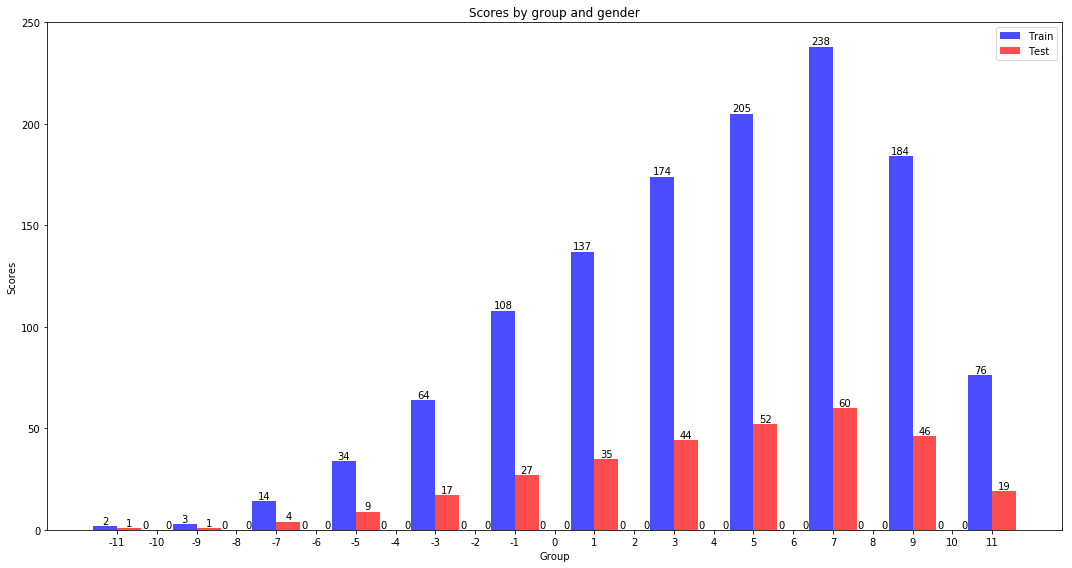

In [22]:
import numpy as np
import matplotlib.pyplot as plt

indecies = [i-11 for i in range(23)]
n_groups = 23

means_men = [len(splitted[i][0]) for i in range(23)]
#std_men = [len(splitted[i][0]) for i in range(23)]

means_women = [len(splitted[i][1]) for i in range(23)]
#std_women = (0, 0, 0, 0, 0)

#fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.6
plt.figure(figsize=(15,8))  

opacity = 0.7
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, means_men, bar_width,
                 alpha=opacity,
                 color='b',
                 
                # yerr=std_men,
                 error_kw=error_config,
                 label='Train')

rects2 = plt.bar(index + bar_width, means_women, bar_width,
                 alpha=opacity,
                 color='r',
                 #yerr=std_women,
                 error_kw=error_config,
                 label='Test')

plt.xlabel('Group')
plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(index + bar_width / 2, [indecies[i] for i in range(23)])
for rect in rects1:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,
                '%d' % int(height),
                ha='center', va='bottom')
for rect in rects2:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,
                '%d' % int(height),
                ha='center', va='bottom')
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
# Write train data
writer_train = open("train.csv", "w")
for i in splitted:
    for j in i[0]:
        line = [e if isinstance(e, str) else str(e) for e in j]
        writer_train.write(",".join(line)+"\n") 
writer_train.close()

In [25]:
# Write test data
writer_test = open("test.csv", "w")
for i in splitted:
    for j in i[1]:
        line = [e if isinstance(e, str) else str(e) for e in j]
        writer_test.write(",".join(line)+"\n") 
writer_test.close()